# Gaussian Naive Bayes

In [37]:
import pandas as pd
df=pd.read_csv('spam.csv',encoding='latin-1')[['v1','v2']]
df.columns=['label','Text']
df['label']=df['label'].map({'ham':0,'spam':1})
df.head()

,label,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [38]:
#Feature Engineering:Extract Numerical Features
df['text_length']=df['Text'].apply(len)
df['num_words']=df['Text'].apply(lambda x: len(x.split()))
df['num_digits']=df['Text'].apply(lambda x: sum(c.isdigit() for c in x))
#Define features and target
x=df[['text_length','num_words','num_digits']]
y=df['label']
#split Dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#standardize the features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
#Train Gaussian Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train_scaled,y_train)
y_pred_gnb=gnb.predict(x_test_scaled)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print("Gaussian Naive Bayes Classifier Performance:")
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_gnb))
print("Classification Report:\n",classification_report(y_test,y_pred_gnb))
print("Accuracy:",accuracy_score(y_test,y_pred_gnb))

Gaussian Naive Bayes Classifier Performance:
Confusion Matrix:
 [[953  12]
 [ 10 140]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.92      0.93      0.93       150

    accuracy                           0.98      1115
   macro avg       0.96      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Accuracy: 0.9802690582959641


# Multinomial Naive Bayes

In [39]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
#convert text data into word count vectors
vectorizer=CountVectorizer(stop_words='english')
x_counts=vectorizer.fit_transform(df['Text'])
#convert count vectors into tf-idf representation
tfidf_transformer=TfidfTransformer()
x_tfidf=tfidf_transformer.fit_transform(x_counts)
#split dataset
x_train, x_test, y_train, y_test = train_test_split(x_tfidf, df['label'], test_size=0.2, random_state=42)
#Train Multinomial Naive Bayes Classifier
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
y_pred_mnb=mnb.predict(x_test)
print("Multinomial Naive Bayes Classifier Performance:")
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_mnb))
print("Classification Report:\n",classification_report(y_test,y_pred_mnb))
print("Accuracy:",accuracy_score(y_test,y_pred_mnb))

Multinomial Naive Bayes Classifier Performance:
Confusion Matrix:
 [[965   0]
 [ 35 115]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.93      1115
weighted avg       0.97      0.97      0.97      1115

Accuracy: 0.968609865470852


# Bernoulli Naive Bayes

In [40]:
#convert text into binary presence/absence of important words
important_words=['free','win','offer','money','urgent']
for word in important_words:
    df[word]=df['Text'].apply(lambda x: 1 if word in x.lower() else 0)
#define features and target
x=df[important_words]
y=df['label']
#split dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#Train Bernoulli Naive Bayes Classifier
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
bnb.fit(x_train,y_train)
y_pred_bnb=bnb.predict(x_test)
print("Bernoulli Naive Bayes Classifier Performance:")
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_bnb))
print("Classification Report:\n",classification_report(y_test,y_pred_bnb))
print("Accuracy:",accuracy_score(y_test,y_pred_bnb))

Bernoulli Naive Bayes Classifier Performance:
Confusion Matrix:
 [[929  36]
 [ 81  69]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       965
           1       0.66      0.46      0.54       150

    accuracy                           0.90      1115
   macro avg       0.79      0.71      0.74      1115
weighted avg       0.88      0.90      0.89      1115

Accuracy: 0.895067264573991


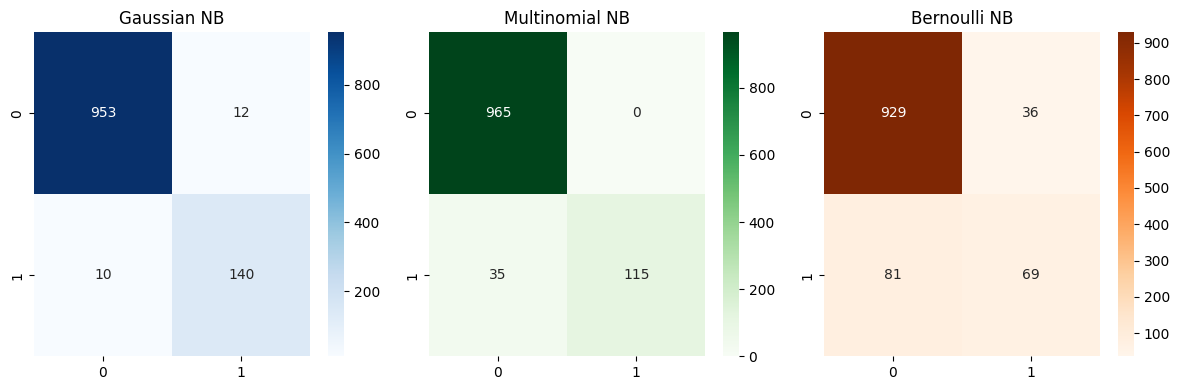

In [41]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.heatmap(confusion_matrix(y_test,y_pred_gnb),annot=True,fmt='d',cmap='Blues')
plt.title('Gaussian NB')
plt.subplot(1,3,2)
sns.heatmap(confusion_matrix(y_test,y_pred_mnb),annot=True,fmt='d',cmap='Greens')
plt.title('Multinomial NB')
plt.subplot(1,3,3)
sns.heatmap(confusion_matrix(y_test,y_pred_bnb),annot=True,fmt='d',cmap='Oranges')
plt.title('Bernoulli NB')
plt.tight_layout()
plt.show()

In [42]:
import pandas as pd
df = pd.read_csv("spam.csv", encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'message']
df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [44]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [45]:
df['label'] = df['label'].map({
    'ham': 0,     # Not suspicious
    'spam': 1     # Suspicious
})


In [46]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['message'])
y = df['label']

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [48]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9763101220387652

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1202
           1       0.91      0.92      0.91       191

    accuracy                           0.98      1393
   macro avg       0.95      0.95      0.95      1393
weighted avg       0.98      0.98      0.98      1393



In [49]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1185,   17],
       [  16,  175]])

In [50]:
tn, fp, fn, tp = cm.ravel()
print("Suspicious messages correctly identified (TP):", tp)
print("Genuine messages incorrectly flagged (FP):", fp)

Suspicious messages correctly identified (TP): 175
Genuine messages incorrectly flagged (FP): 17


In [51]:
def predict_message(msg):
    msg_tfidf = vectorizer.transform([msg])  
    pred = model.predict(msg_tfidf)[0]
    proba = model.predict_proba(msg_tfidf)[0][1]  

    label = "Suspicious" if pred == 1 else "Not suspicious"
    return label, proba
custom_messages = [
    "Congratulations! You won a free iPhone. Click now to claim it!",
    "Hi, can we meet tomorrow in college?",
    "URGENT! Your ATM card is blocked. Update KYC immediately!",
    "Hey bro, send me the notes pdf"
]
for msg in custom_messages:
    label, proba = predict_message(msg)
    print("\nMessage:", msg)
    print("Prediction:", label)
    print("Suspicious probability:", round(proba, 4))



Message: Congratulations! You won a free iPhone. Click now to claim it!
Prediction: Suspicious
Suspicious probability: 1.0

Message: Hi, can we meet tomorrow in college?
Prediction: Not suspicious
Suspicious probability: 0.0001

Message: URGENT! Your ATM card is blocked. Update KYC immediately!
Prediction: Suspicious
Suspicious probability: 0.9091

Message: Hey bro, send me the notes pdf
Prediction: Not suspicious
Suspicious probability: 0.0098
